Lecture Example -- 3/19/2024

$$F = \dfrac{L}{K} (1 - exp(-K(t+a)))$$

Problem: Solve for $K$ assuming that $F, L, t$, and $a$ are given. 

Solution: Newton's Method
Solve for zeros of a function $f(x)$ using an iterative scheme: 
Guess $x_0$ $$x_{k+1} = x_{k} - \dfrac{f(x_k)}{f`(x_k)}$$

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def f(K):
    F = 1
    L = 1
    t = 1
    a = 1
    return L/K*(1-math.exp(-K*(t+a))) - F

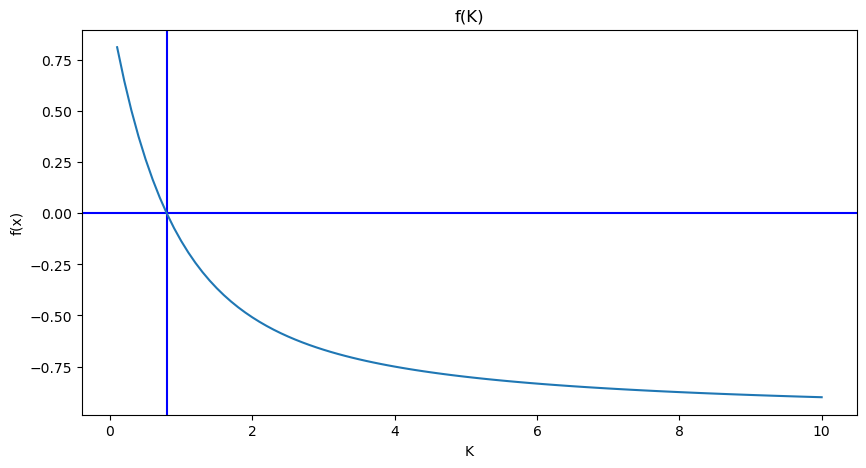

In [45]:
K_vals = np.linspace(0.1, 10, num=100)
plt.figure(figsize = (10, 5))
plt.axvline(x = 0.7968121300200202, color = 'b')
plt.axhline(y = 0, color = 'b')

y_vals = []
for i in range(len(K_vals)):
    y_vals.append(f(K_vals[i]))

plt.plot(x_vals, y_vals)
plt.title("f(K)")
plt.xlabel("K")
plt.ylabel("f(x)")
plt.show()

In [37]:
def newt(x_k):
    F = 1
    L = 1
    t = 1
    a = 1
    diff = L/x_k * ((t+a) * np.exp(-x_k * (t+a))) + (1 - np.exp(-x_k * (t+a))) * (-L / (x_k**2))
    f_k = f(x_k)
    return x_k - f_k/diff

In [48]:
Tol = 10**(-5) #stopping tolerance
x_0 = 5 #initial K value 

def Root(Tol, x_0):
    x_k = x_0
    x_k_1 = newt(x_0)

    interation = 0

    while np.abs(x_k_1 - x_k) > Tol: 
        interation += 1

        if interation == 1000000: 
            print("maximum number of iterations were done")
            break 

        x_k = x_k_1
        x_k_1 = newt(x_k_1)

    return x_k_1

In [49]:
Root(Tol, x_0)

0.7968121300200202

# 1D Random Walk on a Lattice

## 3/36/24

- Start at $x = 0$ on an integer lattice

--- Create discritization of domain space (the grid)

- At each time step, you will step either left or right with a 50-50 probability 

--- Sample categorical distribution for moving either left or right

- Store each location visited
- Run until t=T (final time)
- Plot the trajectory over time e.g. x-axis is time and y-axis is location 


In [3]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
import argparse

In [5]:
# Final time
T = 100

parser = argparse.ArgumentParser()
parser.add_argument("-p", "--plot_flag", help="Plot or Not Plot, defualt is to not plot")

def RandomWalk_1D(T, plot_flag = False):
    rng = default_rng()
    
    start = 0 #begin in center of domain

    #Store locations visited
    locations = [start]

    for i in range(T):
        #probability of moving left or right 
        prob = rng.random(1)
        if prob > 0.5: 
            #move right
            end = start + 1
            locations.append(end)
            start = end
        else:
            #move left 
            end = start - 1
            locations.append(end)
            start = end
            
    times = np.linspace(0,T, T+1)
    if plot_flag == True:
        plt.plot(times, locations)
        plt.title("1D Random Walk with Equal Probability")
        plt.xlabel("Time Step")
        plt.ylabel("Location")
    
    return locations
    # for i in range(-10, 20):
    #     n = i
    #     #plt.axvline(x = i, color = 'grey', alpha = 0.5)
    #     plt.axhline(n, color = 'b', linestyle = '-', alpha = 0.3)
    # plt.show()


In [6]:
#RandomWalk_1D(100)

## 2
Instead of simulating just one realization of this process, do N of them recording all trajectories. 

Plot all of them on the same figure.

In [7]:
N = 10
for i in range(N):
    RandomWalk_1D(100)
    

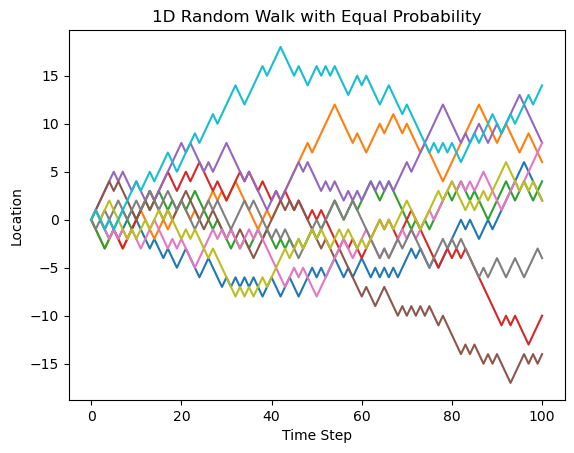

In [9]:
Many_Walks = []
for i in range(N):
    Many_Walks.append(RandomWalk_1D(T, plot_flag=True))
#print(len(Many_Walks))

## 3

Plot a histogram of final locations with N=1,000 (have the ability to turn off plotting for this)

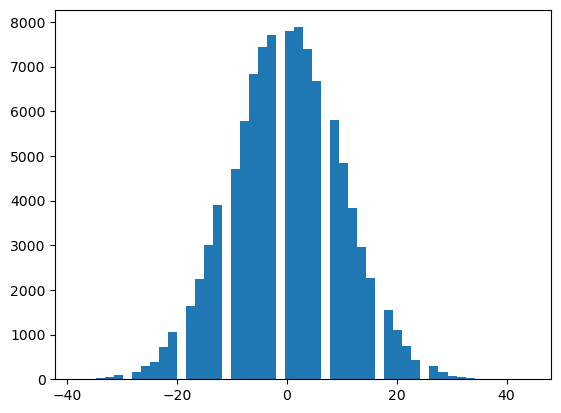

In [17]:
K = 100000
Final = []
for i in range(K):
    Final.append(RandomWalk_1D(T, plot_flag = False)[-1])

plt.hist(Final, bins = 50)
plt.show() 
